In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ** Data Job Ai di Dunia**

In [3]:
data = pd.read_csv("ai_job_dataset.csv")
data.head()


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics


## Ubah ke dataframe

In [4]:
df = pd.DataFrame(data)
df["posting_date"] = pd.to_datetime(df["posting_date"])
df["aplication_deadline"] = pd.to_datetime(df["application_deadline"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   job_id                  15000 non-null  object        
 1   job_title               15000 non-null  object        
 2   salary_usd              15000 non-null  int64         
 3   salary_currency         15000 non-null  object        
 4   experience_level        15000 non-null  object        
 5   employment_type         15000 non-null  object        
 6   company_location        15000 non-null  object        
 7   company_size            15000 non-null  object        
 8   employee_residence      15000 non-null  object        
 9   remote_ratio            15000 non-null  int64         
 10  required_skills         15000 non-null  object        
 11  education_required      15000 non-null  object        
 12  years_experience        15000 non-null  int64 

# Analisis per Kolom

## Pekerjaan Ai paling populer

In [5]:
Job_title = df["job_title"].value_counts().head(10)
Job_title

,count
job_title,
Machine Learning Researcher,808
AI Software Engineer,784
Autonomous Systems Engineer,777
Machine Learning Engineer,772
AI Architect,771
Head of AI,765
NLP Engineer,762
Robotics Engineer,759
Data Analyst,759


### Visualisasi dan penjelasan

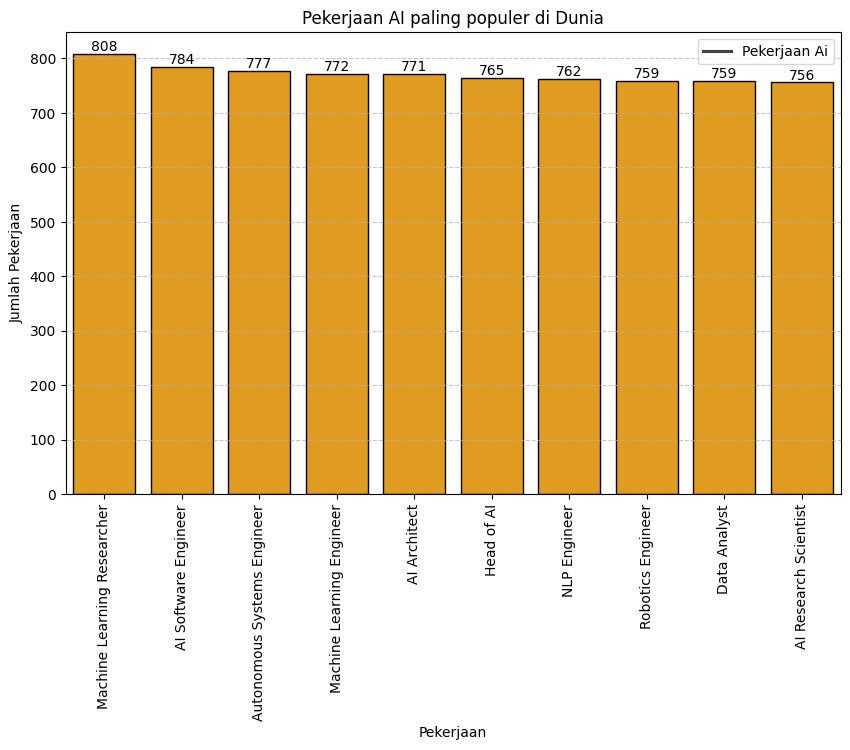

In [6]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=Job_title.index, y=Job_title.values, color="orange", edgecolor="black")
#tampilkan angka
for container in ax.containers:
    ax.bar_label(container)
plt.title("Pekerjaan AI paling populer di Dunia")
plt.xlabel("Pekerjaan")
plt.ylabel("Jumlah Pekerjaan")
plt.xticks(rotation=90)
plt.grid(axis="y", alpha=0.7, linestyle="--")
plt.legend(["Pekerjaan Ai"])
plt.show()


Grafik ini menampilkan 10 pekerjaan terkait AI (Kecerdasan Buatan) yang paling banyak populer di seluruh dunia, dengan "Machine Learning Researcher" menduduki peringkat teratas dengan 808 pencarian, menunjukkan tingginya permintaan akan penelitian di bidang ini. Posisi lain seperti AI Software Engineer dan Autonomous Systems Engineer juga sangat diminati, menegaskan pertumbuhan pesat sektor AI dan banyaknya peluang karir yang tersedia bagi individu dengan berbagai keahlian di bidang tersebut.

## salary USD

### mencari statistik deskriptif salary usd

In [7]:
df["salary_usd"].describe()

,salary_usd
count,15000.000000
mean,115348.965133
std,60260.940438
min,32519.000000
25%,70179.750000
50%,99705.000000
75%,146408.500000
max,399095.000000


### Distribusi dan outlier salary usd

In [8]:
# skew dan kurtosis salary usd
df["salary_usd"].skew(),df["salary_usd"].kurtosis()

(np.float64(1.2527592133197596), np.float64(1.56922226950801))


1.   skew : < 0 = miring ke kiri, 0 = normal(ditengah), > 0 =  miring ke kanan
2.   kurtorsis
< 0	Platikurtik → data lebih datar, distribusi lebih lebar, sedikit outlier, = 0	Mesokurtik → distribusi normal (seperti distribusi normal standar), > 0	Leptokurtik → distribusi runcing/puncak tinggi, banyak nilai ekstrem (outlier)

In [9]:
Q1 = df["salary_usd"].quantile(0.25)
Q3 = df["salary_usd"].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df["salary_usd"] < Q1 - 1.5*IQR) | (df["salary_usd"] > Q3 + 1.5*IQR)]
print("Jumlah outlier salary_usd:", len(outliers))

Jumlah outlier salary_usd: 483


### Hisplot dan blox plot salary usd

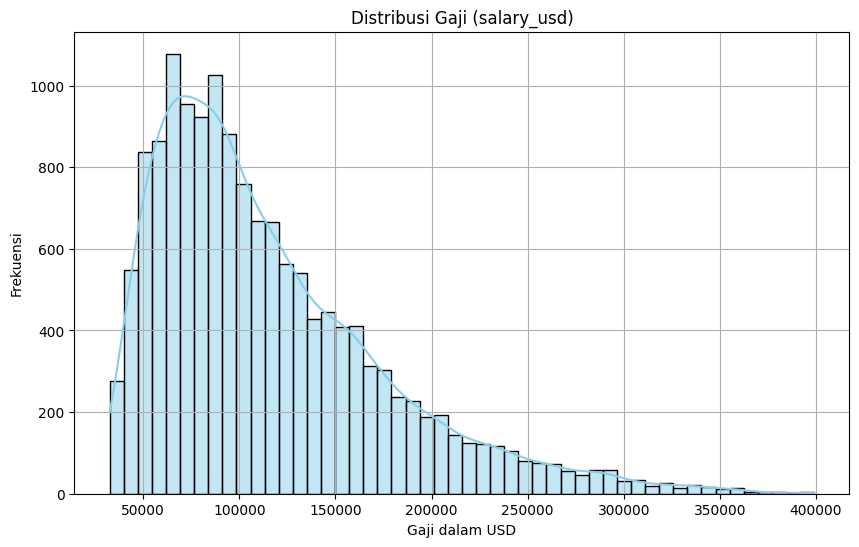

In [10]:
# Hisplot
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="salary_usd", bins=50, kde=True, color="skyblue")
plt.title("Distribusi Gaji (salary_usd)")
plt.xlabel("Gaji dalam USD")
plt.ylabel("Frekuensi")
plt.grid(True)
plt.show()

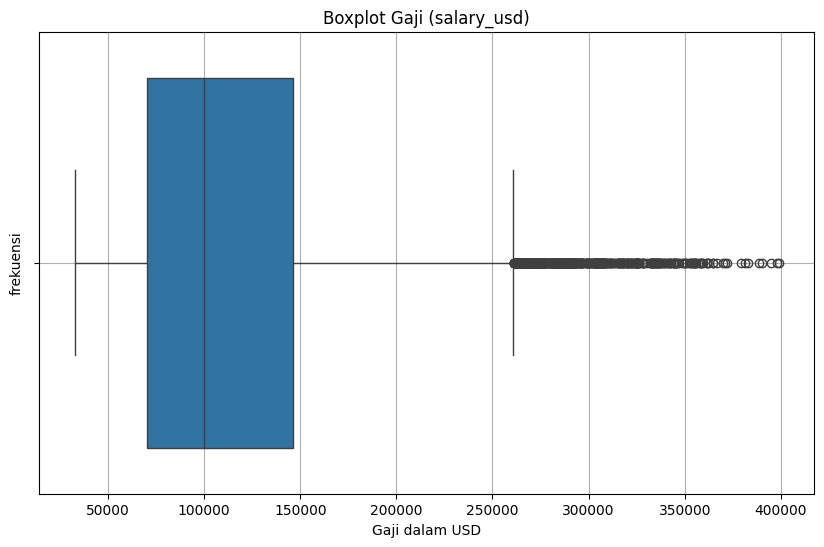

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="salary_usd")
plt.title("Boxplot Gaji (salary_usd)")
plt.xlabel("Gaji dalam USD")
plt.ylabel("frekuensi")
plt.grid(True)
plt.show()

### Keismpulan

Jika kita ingin mengitung keterkaitan menggunakan salary usd kita menggunakan **Median**

# Analisis hubungan antar kolom

## Berapakah gaji untuk jenis pekerjaan Job AI

### EDA(exploratory Data Analysis)

In [12]:
# rata-rata gaji per job
gaji_per_job = df.groupby("job_title")["salary_usd"].median().sort_values(ascending=False) # pakai median karena diawal udah di lihat karena datanya tidak normal
gaji_per_job



,salary_usd
job_title,
Data Engineer,104447.0
Machine Learning Engineer,103687.0
AI Specialist,103626.5
Head of AI,102025.0
ML Ops Engineer,101624.0
AI Consultant,101471.0
AI Research Scientist,100990.0
Robotics Engineer,100714.0
Data Scientist,100529.5


### Visualisasi median gaji dan jenis pakerjaan

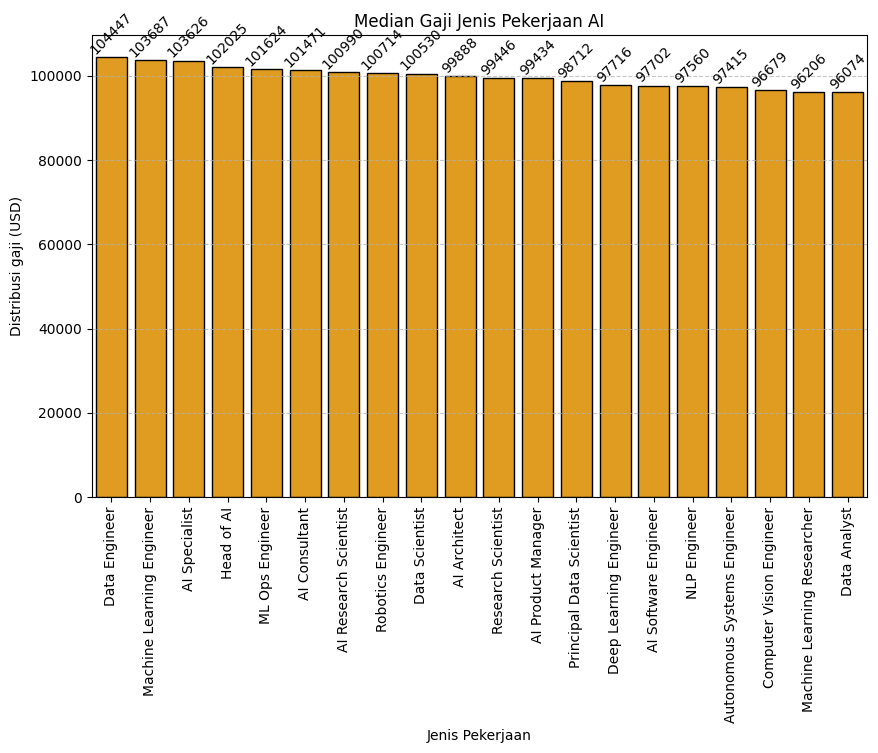

In [30]:
# Barplot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=gaji_per_job.index, y=gaji_per_job.values, color="orange", edgecolor="black")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", rotation=45)
plt.title("Median Gaji Jenis Pekerjaan AI")
plt.xlabel("Jenis Pekerjaan")
plt.ylabel("Distribusi gaji (USD)")
plt.xticks(rotation=90)
plt.grid(axis="y", alpha=0.7, linestyle="--")
plt.show()

Plot di atas memperlihatkan perbandingan median gaji berdasarkan jenis pekerjaan di bidang AI. Terlihat bahwa Data Engineer dan Machine Learning Engineer memperoleh kompensasi median tertinggi, yaitu sekitar 104.000 USD per tahun. Sementara itu, Data Analyst dan Machine Learning Researcher memiliki median gaji paling rendah, meski tetap berada di kisaran $96.000 USD, yang masih termasuk tinggi dalam standar industri. Perbedaan antar jenis pekerjaan tidak ekstrem, namun tetap memberi gambaran bahwa posisi seperti engineering dan spesialisasi memiliki daya tawar lebih tinggi dalam kompensasi.

### Analisis statistik gaji AI job

## Apakah pekerjaan remote mempengaruhi gaji

### EDA(exploratory Data Analysis)

In [38]:
# rata-rata gaji perrjaan remote dan tidak
remote_gaji = df.groupby("remote_ratio")["salary_usd"].median()
remote_gaji

,salary_usd
remote_ratio,
0,98817.0
50,99295.0
100,100614.0


0 = full onsite

50 = hybrid

100 = full remote

salary_usd → gaji dalam USD

### visualisasi

Text(0, 0.5, 'Distribusi (USD)')

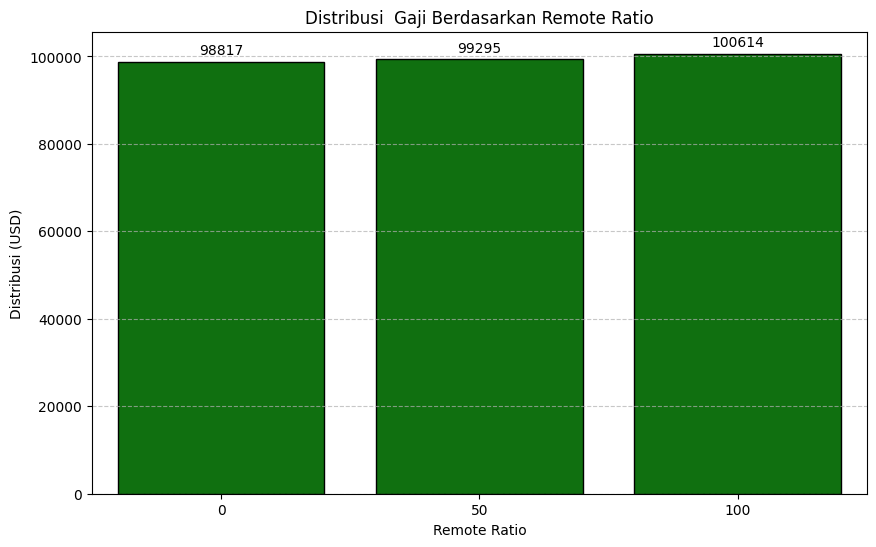

In [39]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x=remote_gaji.index, y=remote_gaji.values, color="green", edgecolor="black")
for container in ax.containers:
    ax.bar_label(container , fmt="%.0f", padding=3)
plt.title("Distribusi  Gaji Berdasarkan Remote Ratio")
plt.xlabel("Remote Ratio")
plt.grid(axis="y", alpha=0.7, linestyle="--")
plt.ylabel("Distribusi (USD)")

Secara umum, semakin tinggi remote_ratio (semakin remote), median gaji cenderung naik.

Insight:
1.   Pekerja full remote (100%) memiliki median gaji tertinggi
2.   Pekerja on-site (0%) memiliki median gaji terendah.
3.   Perbedaan gaji antar kategori tidak terlalu besar, tapi ada tren positif.


### Analisis statistik gaji berdasarkan remote

## Apakah pengalaman dan gelar mempengaruhi gaji

In [40]:
#hitung rata" gaji berdasarkan pengalaman dan pendidikan
gaji = df.pivot_table(index="experience_level", columns="education_required", values="salary_usd", aggfunc="median")
gaji

education_required,Associate,Bachelor,Master,PhD
experience_level,,,,
EN,60583.5,59823.0,60443.5,60578.0
EX,176004.0,178513.0,174800.5,179955.0
MI,84980.0,84863.0,84934.0,82632.5
SE,115871.5,117817.5,117146.0,117083.0


### visualisasi

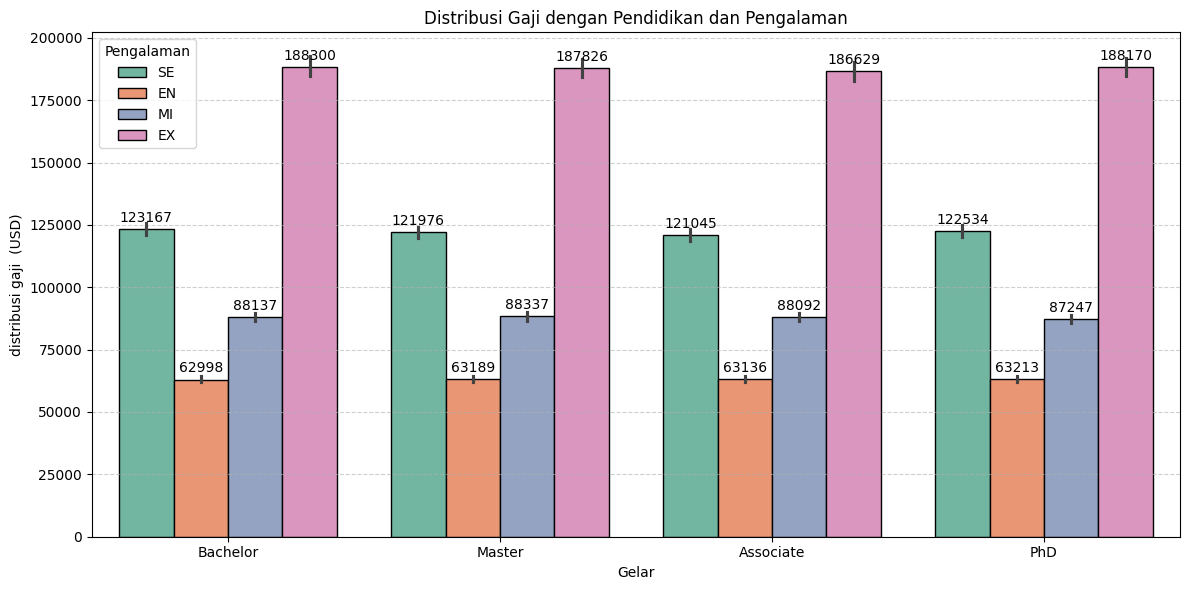

In [42]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x="education_required", y="salary_usd", hue="experience_level", estimator="mean", palette="Set2", edgecolor='black')
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3)
plt.title("Distribusi Gaji dengan Pendidikan dan Pengalaman")
plt.xlabel("Gelar")
plt.ylabel("distribusi gaji  (USD)")
plt.legend(title="Pengalaman")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()

Gaji dalam bidang AI secara konsisten meningkat seiring bertambahnya level pengalaman, terlepas dari tingkat pendidikan. Hal ini menunjukkan bahwa pengalaman kerja (senior, executive) adalah faktor yang jauh lebih menentukan dalam kompensasi gaji dibandingkan latar belakang akademis

### Uji Statistik

## Negara mana yang lebih kompetitif dengan gaji

In [45]:
kompe_gaji = df.groupby("company_location")["salary_usd"].median().sort_values(ascending=False)
kompe_gaji

,salary_usd
company_location,
Switzerland,152901.0
Denmark,147504.5
Norway,142386.0
United States,128606.0
United Kingdom,115281.0
Singapore,115122.0
Netherlands,112202.0
Sweden,109435.0
Germany,106923.0


### Visualisasi

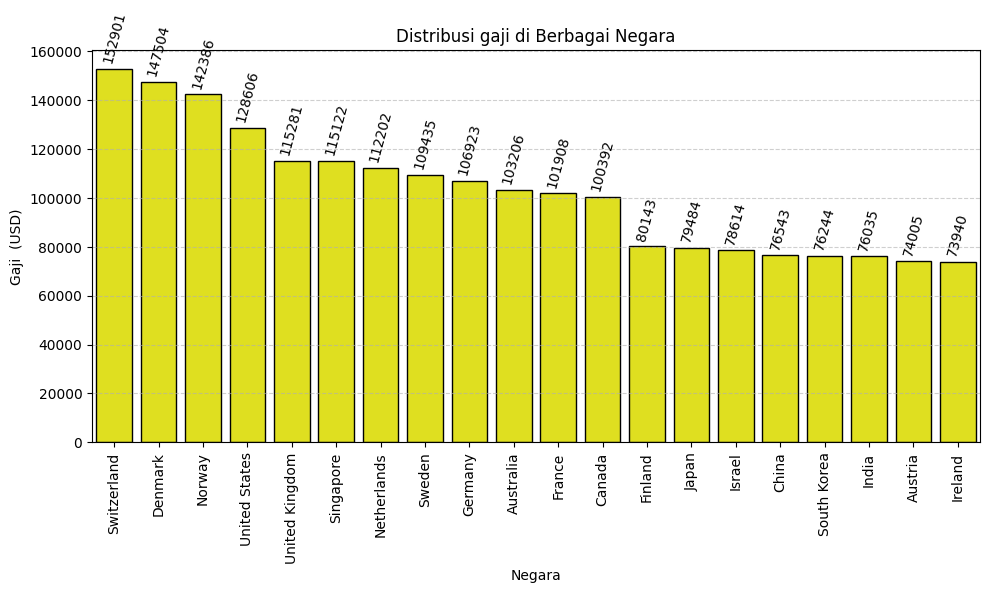

In [48]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=kompe_gaji.index, y=kompe_gaji.values, color="yellow", edgecolor="black")
for container in ax.containers:
    ax.bar_label(container, fmt="%.0f", padding=3, rotation=75)
plt.title("Distribusi gaji di Berbagai Negara")
plt.xlabel("Negara")
plt.ylabel("Gaji  (USD)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Data menunjukkan ketimpangan geografis dalam kompensasi pekerjaan AI. Negara-negara Eropa Barat dan Amerika Utara menawarkan gaji yang lebih tinggi, kemungkinan karena tingginya biaya hidup, permintaan tenaga kerja ahli, dan pasar teknologi yang matang. Sebaliknya, negara-negara Asia dan Eropa Timur menawarkan gaji lebih rendah namun bisa kompetitif jika disesuaikan dengan biaya hidup lokal.

### Anlisis statistik